D:\Programming\Python programs\Sushil Gautam\Computer Graphics


Enter x-min and y-min respectively:  3 3
Enter x-max and y-max respectively:  5 6
Enter initial point of line:  1 0
Enter final point of line:  4 4


Before clipping		After clipping
(1.0, 0.0)		(3.25, 3.0)
(4.0, 4.0)		(4.0, 4.0)


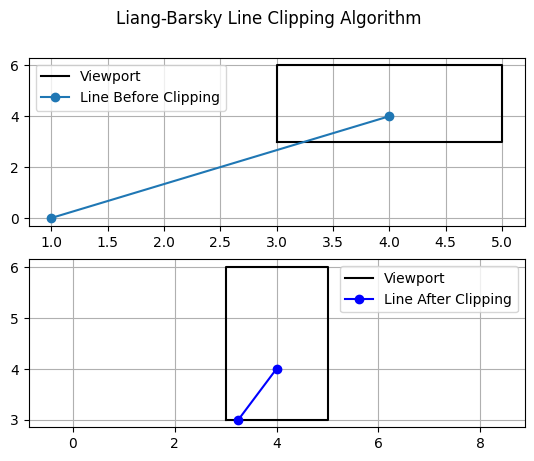

In [1]:
import matplotlib.pyplot as plt
import os
print(os.getcwd())

def liang_barsky(x_min, y_min, x_max, y_max, x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    p = [-dx, dx, -dy, dy]
    q = [x1 - x_min, x_max - x1, y1 - y_min, y_max - y1]
    t_enter = 0.0
    t_exit = 1.0

    for i in range(4):
        if p[i] == 0:  # Check if line is parallel to the clipping boundary
            if q[i] < 0:
                return None  # Line is outside and parallel, so completely discarded
        else:
            t = q[i] / p[i]
            if p[i] < 0:
                if t > t_enter:
                    t_enter = t
            else:
                if t < t_exit:
                    t_exit = t

    if t_enter > t_exit:
        return None  # Line is completely outside

    x1_clip = x1 + t_enter * dx
    y1_clip = y1 + t_enter * dy
    x2_clip = x1 + t_exit * dx
    y2_clip = y1 + t_exit * dy

    return x1_clip, y1_clip, x2_clip, y2_clip


# Define the clipping window and plotting it
x_min,y_min=map(float,input("Enter x-min and y-min respectively: ").split())
x_max,y_max=map(float,input("Enter x-max and y-max respectively: ").split())
viewport=[[x_min,y_min],[x_max,y_min],[x_max,y_max],[x_min,y_max]]
x,y=zip(*viewport)
fig, [ax, ax1] = plt.subplots(2, 1)
ax.plot(x+(x[0],),y+(y[0],),color="black",label="Viewport")
ax1.plot(x+(x[0],),y+(y[0],),color="black",label="Viewport")


# Define the line (starting and ending points) 
x1,y1=map(float,input("Enter initial point of line: ").split())
x2,y2=map(float,input("Enter final point of line: ").split())
x_list=[x1,x2]
y_list=[y1,y2]
ax.plot(x_list,y_list,marker='o',label="Line Before Clipping")


clipped_line = liang_barsky(x_min, y_min, x_max, y_max, x1, y1, x2, y2)

if clipped_line is not None:
    x1_clip, y1_clip, x2_clip, y2_clip = clipped_line
    copyx,copyy=[x1_clip, x2_clip],[y1_clip, y2_clip]
    # Plot the clipped line
    ax1.plot(copyx,copyy , 'b', label='Line After Clipping', marker="o")
    print("Before clipping\t\tAfter clipping")
    for i in range(2):
        print(f"{x_list[i],y_list[i]}\t\t{round(copyx[i],2),round(copyy[i],2)}")
else:
    print('Line is outside the clipping window')
    

ax1.legend()
ax.legend()
ax.grid(True)
ax1.grid(True)
plt.suptitle("Liang-Barsky Line Clipping Algorithm")
plt.axis('equal')
plt.show()
